hello exam.02.py!


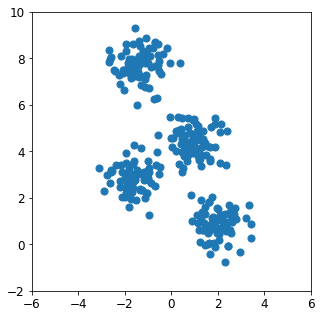

max 103
Các điểm trung tâm thuật toán K-Means tìm được cho trường hợp 1: 
 [[-0.8690418654714699 6.95206028541128]
 [1.5188474613402265 4.436961465500449]
 [1.7486570651263251 1.4006985371326912]
 [-1.584384669643881 2.8308126302571552]]
Dự đoán [0.4973050549090461, 0.47030753078072074] ['k']
max 92
Các điểm trung tâm thuật toán K-Means tìm được cho trường hợp 2: 
 [[1.0072507895443683 4.658124407714372]
 [1.9845885205143146 0.9688163771766238]
 [-1.1858879143627707 3.0114684021463884]
 [-1.3732439791827424 7.75368870941779]]
Dự đoán [1.3935125815679656, 9.204124814672813] ['m']


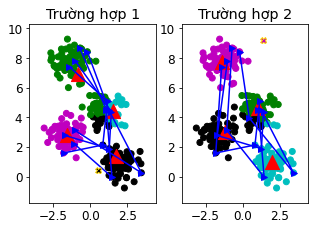

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

print("hello exam.02.py!")


# Cấu hình các tham số
Nb_cluster = 4
numIterations = 100
colors = ["g", "c", "k", "m"]
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.6)
data = X


# change default figure and font size
plt.rcParams["figure.figsize"] = 5, 6
plt.rcParams["font.size"] = 12


# scatter plot
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect("equal")
try:
    plt.savefig("output/exam.02/chart/01. scatter.plot.data.png")
except:
    plt.show()




# k = 4
# maxiter = 100
def kmeans(X, k, maxiter, seed=None):
    """
    chỉ ra số lượng nhóm k cần phân loại 
    và số vòng lặp tối đa maxiter của thuật toán
    """

    # Chọn ngẫu nhiên k điểm dữ liệu làm centroids
    max = 0
    tol = 0.001
    labels = 75*colors
    centroids = {}
    for i in range(k):
        f = np.random.randint(0, len(X) - 1)
        centroids[i] = X[f]
    new_centroids = centroids.copy()

    for itr in range(maxiter):
        # ---------------
        # Bước gán vào phân nhóm
        # ---------------
        # Tính ma trận khoảng cách giữa mỗi điểm dữ liệu với các  centroids
        cluster_assignment = {}
        for i in range(k):
            cluster_assignment[i] = []

        # distance_matrix = # chỉ số hàng = chỉ số điểm dữ liệu; chỉ số cột = chỉ số của các centroids; giá trị = khoảng cách
        # gán mỗi điểm dữ liệu vào cùng nhóm với centroid gần nhất
        # cluster_assignment = # chỉ số mảng = chỉ số điểm dữ liệu; giá trị mảng = chỉ số của centroid gần nhất
        for index, xy in enumerate(X):
            distance_matrix = [np.linalg.norm(xy-centroids[centroid]) for centroid in centroids]
            cluster_ = distance_matrix.index(min(distance_matrix))
            c = cluster_ % len(colors)
            color = colors[c]
            labels[index] = color
            cluster_assignment[cluster_].append(xy)

        # Bước cập nhật:
        # chọn tất cả các điểm dữ liệu thuộc nhóm itr và tính
        # tọa độ trung bình của tất cả các điểm dữ liệu mới
        # tọa độ trung bình đó sẽ là vị trí mới của centroid của nhóm itr
        # new_centroids = ...
        for cluster_ in cluster_assignment:
            arr = cluster_assignment[cluster_]
            new_centroids[cluster_] = np.average(arr, axis=0)
            n = len(arr)
            if(n > max):
                max = n
            

        # Điều kiện dừng:
        # nếu toàn bộ vị trí của các centroids không thay đổi sau vòng lặp
        # => thoát vòng lặp
        isBreak = False
        for c in centroids:
            a = centroids[c]
            b = new_centroids[c]
            if np.sum((b-a)/a*100.0) > tol:
                isBreak = True
                break

        if isBreak:
            break

    centers_Hist = []
    new_centroids = np.array(list(new_centroids.values()), dtype=object)
    cluster_assignment = np.array(list(cluster_assignment.values()), dtype=object)


    print("max", max)
    for i in range(len(centroids)):
        try:
            arr = cluster_assignment[i]
            n = max - len(arr)
            f = len(arr)-1
            if n <= 0 or f <= 0 or f >= len(arr):
                pass
            itm = arr[f]
            for j in range(n):
                arr.append(itm)
            centers_Hist.append(np.array(arr))
        except:
            print("loop.error")
        
    centers_Hist = np.array(centers_Hist)
    data = [labels, new_centroids, centers_Hist]

    return data


def plot_kmeans(data, labels, centroids, centroids_Hist=None):
    '''
    Hàm vẽ biểu đồ điểm dữ liệu mô phỏng thuật toán K-Means.
    
    HÀM NÀY ĐƯỢC CUNG CẤP SẴN CHO CÁC BẠN DÙNG, 
    CÁC BẠN KHÔNG CHỈNH SỬA NỘI DUNG HÀM MÀ CHỈ SỬ DỤNG THÔI.
    
    Arguments:
    data             --- dữ liệu đầu vào
    labels           --- nhãn cho mỗi điểm dữ liệu sau khi chạy thuật toán K-Means
    centroids        --- điểm trung tâm của các nhóm sau khi chạy thuật toán K-Means
    centroids_Hist   --- danh sách chứa tọa độ các của các centroids sau mỗi vòng lặp
    
    '''
    
    # cấu hình biểu đồ (figure)
    plt.rcParams['figure.figsize'] = 15, 6 
    plt.rcParams['font.size'] = 12
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    plt.ylim(ymin - 1, ymax + 1)
    plt.xlim(xmin - 1, xmax + 1)
    plt.gca().set_aspect('equal')
    
    # vẽ biểu đồ dạng scatter
    plt.scatter(data[:,0], data[:,1], c = labels)
    plt.scatter(centroids[:,0], centroids[:,1], c = 'r', marker='^', s=200)
    if centroids_Hist is not None:
        for i in range(len(centroids)):
            plt.plot(centroids_Hist[:,i,0], centroids_Hist[:,i,1], c = 'b', marker=">")


# kmeans(X=X, k=Nb_cluster, maxiter=numIterations)


def predict(data,labels,xy):
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(data,labels)
    predicted = model.predict([xy])
    return predicted


for i in range(1,3):
    # áp dụng thuật toán K-Means trên tập dữ liệu đầu vào
    labels, centers, centers_Hist = kmeans(X=data,k=Nb_cluster,maxiter=numIterations)
    print('Các điểm trung tâm thuật toán K-Means tìm được cho trường hợp {0}: \n'.format(i),  centers)
    x = np.random.uniform(-4, 4)
    y = np.random.uniform(-2, 10)
    xy = [x, y]
    class_ = predict(data=centers,labels=colors,xy=xy)
    print("Dự đoán {xy}".format(xy=xy), class_)

    # vẽ biểu đồ hiển thị kết quả của thuật toán K-Means
    plt.subplot(1,2,i)
    plt.title('Trường hợp {0}'.format(i))
    plot_kmeans(data, labels, centers, centers_Hist)
    plt.plot([x], [y], c = "gold", marker="X", markerfacecolor=class_[0])

try:
    plt.savefig("output/exam.02/chart/02. scatter.plot.predict.png")
except:
    plt.show()

